**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#**PART 1**:  Simple Linear Regression - Manual Calculation
In this project, you will perform a manual calculation of the coefficients used in a simple linear regression model for a given dataset.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.

-  **Step 1**:  For the input parameters (dataset) given in the cell below, create a scatter plot of Glucose level (y parameter) vs. Age (x parameter).
-  **Step 2**:  Calculate the coefficients for a simple linear regression model using the following equations:  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  

$$\hat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2}
$$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 3**:  Create a scatter plot of the input dataset and generated regression line on the same plot. 
-  **Step 4**:  Calculate the performance using R-squared using sklearn r2_score function (you may use the sklearn library for this step).
-  **Step 5**:  Confirm your calculated coefficients and R-squared performance metric using the embedded doctest module.  Record your regression equation - you will need to upload this to the accompanying assignment.
-  **Step 6**:  Reflect on the performance of your model.  What does the R-squared parameter tell you about the properties of this dataset and your simple linear prediction?  For example, is age a good predictor of glucose level?  You will answer this question in the accompanying assignment.

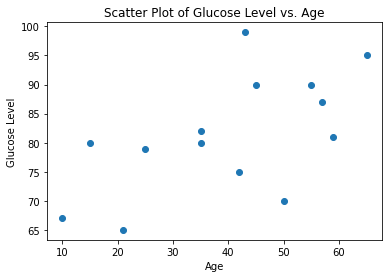

b0: 67.348
b1: 0.354


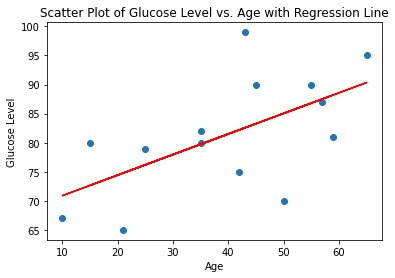

r2: 0.357


TestResults(failed=0, attempted=3)

In [1]:
#Simple Linear Regression - Manual Calculation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])


#Step 1:  Create a scatter plot of Glucose level (y parameter) vs. Age (x parameter). 
#         Your plot must include x and y labels.
# YOUR CODE HERE...

plt.scatter(Age, Glucose)
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Scatter Plot of Glucose Level vs. Age')
plt.show()

#Step 2:  Create a function which MANALLY (using the equations) calculates the 
#         coefficients for a simple linear regression model.
#         Your function must input numpy arrays for the x and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above. 
#         (NOTE - you may not use a model API for this step, calculate the parameters use the equations above).
def simpleLRcoeffsManual(X, Y):
# return the tuple b0, b1 in this order
# YOUR CODE HERE...

    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    numerator = np.sum((X - x_mean) * (Y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    b1 = numerator / denominator
    b0 = y_mean - b1 * x_mean
    return b0, b1



b0, b1 = simpleLRcoeffsManual(Age, Glucose)
print('b0:', round(b0, 3))
print('b1:', round(b1, 3))


#Step 3:  Create a scatter plot of the input dataset and generated regression line (yhat = x*b1 + b0) on the same plot.
# YOUR CODE HERE...

yhat = b0 + b1 * Age

plt.scatter(Age, Glucose)
plt.plot(Age, yhat, color='red')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Scatter Plot of Glucose Level vs. Age with Regression Line')
plt.show()

#Step 4:  Create a function which calculates the performance using R-squared using sklearn r2_score function.
#         Your function input parameters are y (actual values) and y_hat (predicted).
#         Your function returns the R-squared value
#         Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def simpleLRscore(y, yhat):
# YOUR CODE HERE...
    return r2_score(y, yhat)

r2 = simpleLRscore(Glucose, yhat)
print('r2:', round(r2, 3))

#Step 5:  Run the doctest module.  DO NOT modify any code below this line!
import doctest
"""
  >>> print('b1:', round(simpleLRcoeffsManual(Age, Glucose)[1], 3))
  b1: 0.354
  >>> print('b0:', round(simpleLRcoeffsManual(Age, Glucose)[0], 3))
  b0: 67.348
  >>> print('r2:', round(simpleLRscore(Glucose, yhat), 3))
  r2: 0.357
"""

doctest.testmod()

#**PART 2**:  Simple Linear Regression using Scikit learn

In this project, you will experiment with the functions used to train a simple linear regression model using the Scikit learn library.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Calculate the coefficients for a simple linear regression model using the appropriate sklearn functions (see the code below for hints).
-  **Step 2**:  Create a scatter plot of the input dataset and generated regression line on the same plot. 
-  **Step 3**:  Calculate the performance using R-squared using sklearn r2_score function. 
-  **Step 4**:  Run the cell and confirm the coefficients and R-squared using the embedded doctest module.  
-  **Step 5**:  Reflect on the performance of your model.  Confirm your outputs are the same as from Part 1, are they the same and should they be the same?


b1: 0.3539124057393234
b0: 67.34791357165692


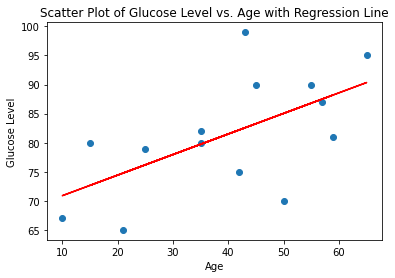

r2: 0.3573300148076213


TestResults(failed=0, attempted=3)

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])
AgeReshaped = Age.T.reshape(-1,1)   #T=transpose, -1=unknown rows, 1=col 
GlucoseReshaped = Glucose.T.reshape(-1,1) 


#Step 2:  Create a function which calculates the coefficients for a simple linear regression model 
#         Your function must input numpy arrays for the x and y variables and return coefficients b0,b1, and Yhat (predicted output).
#         Your function MUST use the sklearn functions.
#         Hint: Construct a linear regression object, then "fit" the data:
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         
#         
def simpleLRcoeffsSkLearn(X, Y):
#Return the tuple: b1, b0, Yhat in this order 
#Note - you must return your outputs in the order above in order to pass the doctest module.
# YOUR CODE HERE...
    model = LinearRegression()
    model.fit(X, Y)
    b1 = model.coef_
    b0 = model.intercept_
    Yhat = model.predict(X)
    return b1, b0, Yhat

b1, b0, Yhat = simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)
print('b1:', b1[0][0])
print('b0:', b0[0])
    
#Step 3:  Create a scatter plot of the input dataset and generated regression line on the same plot.
#         Hint: make sure you transpose and reshape yhat.  (yhat.T.reshape(-1,1))
# YOUR CODE HERE...
Yhat=Yhat.T.reshape(-1,1)
plt.scatter(Age, Glucose)
plt.plot(Age, Yhat, color='red')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Scatter Plot of Glucose Level vs. Age with Regression Line')
plt.show()

#Step 4:  Calculate the performance using R-squared using sklearn r2_score function.
def simpleLRscoreSkLearn(y, yhat):
# YOUR CODE HERE...
    return r2_score(y, yhat)

r2 = simpleLRscoreSkLearn(Glucose, Yhat)

print('r2:', r2)

#Step 5:  Run the doctest module.  DO NOT modify any code below this line!

import doctest
"""
  >>> print('b1:', simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[0][0])
  b1: [0.35391241]
  >>> print('b0:', simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[1][0])
  b0: 67.34791357165692
  >>> print('r2:', simpleLRscoreSkLearn(GlucoseReshaped, simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[2]))
  r2: 0.3573300148076213
"""

doctest.testmod()

#**PART 3**: Multiple Linear Regression
In this project, you will expand on the example provided in the lecture train a multiple linear regression model using Pandas and the Scikit learn library and determine which independent variables have the greatest effect on the model performance.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.  The Multiple Linear Regression equation is shown here for reference:  

$$\hat y = b_0+b_1x_1+b_2x_2=B^T\cdot X$$   

Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Input the Stock Market dataset into a Pandas dataframe.
-  **Step 2**:  Examine the relationship between the variables
-  **Step 3**:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
-  **Step 4**:  Fit the regression model for ALL combinations of indep vars
-  **Step 5**:  Predict the stock index price using your top 2 models from the test cases shown in the code cell below (i.e. test your top 2 models with the best r2 scores).
-  **Step 6**: Record your regression equation - you will need to upload this to the accompanying assignment. Reflect on your results.  What combination of independent variables gave the best performing model?  Note that the more variable you use in your model, the more memory and processing resources you will need so does it make sense to use all of your independent variables if a subset is close in performance?


              Year     Month  Interest_Rate  Unemployment_Rate        GDP  \
count    36.000000  36.00000      36.000000          36.000000  36.000000   
mean   2017.000000   6.50000       2.183333           5.891667  20.450000   
std       0.828079   3.50102       0.351308           0.175507   1.053565   
min    2016.000000   1.00000       1.600000           5.600000  18.700000   
25%    2016.000000   3.75000       1.892500           5.745000  19.575000   
50%    2017.000000   6.50000       2.185000           5.890000  20.450000   
75%    2018.000000   9.25000       2.477500           6.035000  21.325000   
max    2018.000000  12.00000       2.770000           6.180000  22.200000   

       Stock_Index_Price  
count          36.000000  
mean         1065.944444  
std           178.332746  
min           704.000000  
25%           955.750000  
50%          1054.500000  
75%          1180.000000  
max          1464.000000  
   Year  Month  Interest_Rate  Unemployment_Rate   GDP  Stock_I

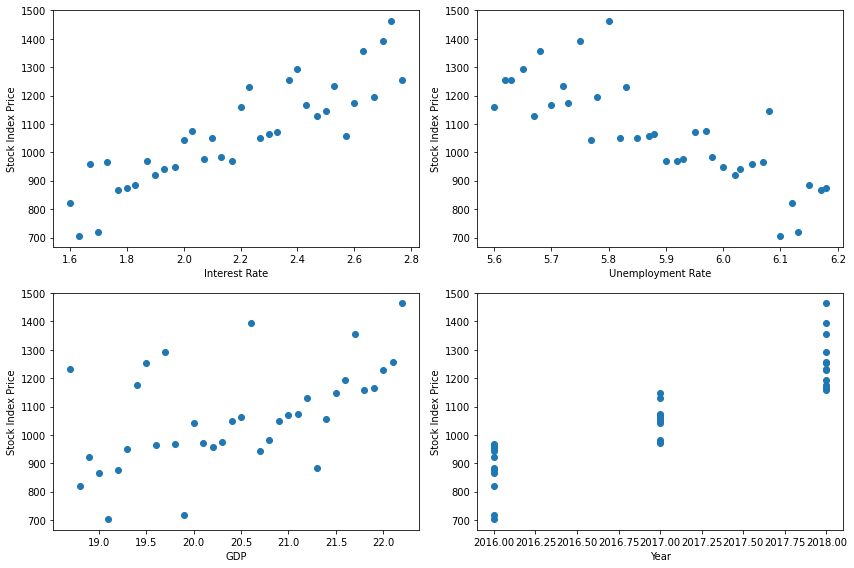

Case: ['Interest_Rate']
Intercept: 89.49634225391299
Coefficients: [447.22813841]
Case: ['Unemployment_Rate']
Intercept: 5872.544739201681
Coefficients: [-815.83031877]
Case: ['GDP']
Intercept: -752.8159159159161
Coefficients: [88.93693694]
Case: ['Interest_Rate', 'Unemployment_Rate']
Intercept: 2197.7528706602875
Coefficients: [ 327.09060652 -313.31647815]
Case: ['Interest_Rate', 'GDP']
Intercept: -288.4747407568698
Coefficients: [415.47404803  21.87290205]
Case: ['Unemployment_Rate', 'GDP']
Intercept: 4425.8357558077205
Coefficients: [-716.66435407   42.17389607]
Case: ['Interest_Rate', 'Unemployment_Rate', 'GDP']
Intercept: 1802.3978378130578
Coefficients: [ 299.610547   -307.27216408   20.52528504]
Test Case: {'Interest_Rate': 2.75, 'Unemployment_Rate': 5.3, 'GDP': 20.0}
Case 1 Prediction: 1436.674704376127
Case 2 Prediction: 1291.5369324065796

Test Case: {'Interest_Rate': 2.9, 'Unemployment_Rate': 5.9, 'GDP': 21.0}
Case 1 Prediction: 1297.7484084626724
Case 2 Prediction: 1375.730

In [3]:
#Multiple Linear Regression
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,\
                         2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],\
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1],\
                'Interest_Rate':[2.73, 2.7,  2.63, 2.4,  2.37, 2.77, 2.53, 2.23, 2.67, 2.6,  2.43, 2.2,  2.5,  2.47,\
                                 2.03, 2.33, 2.3,  2.57, 2.27, 2.1,  2.,   2.13, 2.07, 2.17, 1.87, 1.73, 1.67, 1.97,\
                                 1.93, 1.9,  1.83, 1.8,  1.77, 1.6,  1.7,  1.63],\
                'Unemployment_Rate':[5.8,  5.75, 5.68, 5.65, 5.63, 5.62, 5.72, 5.83, 5.78, 5.73, 5.7,  5.6,  6.08, 5.67,\
                                     5.97, 5.95, 5.88, 5.87, 5.85, 5.82, 5.77, 5.98, 5.93, 5.92, 5.9,  6.07, 6.05, 6.,\
                                     6.03, 6.02, 6.15, 6.18, 6.17, 6.12, 6.13, 6.1],\
                'GDP':[22.2, 20.6, 21.7, 19.7, 22.1, 19.5, 18.7, 22.,  21.6, 19.4, 21.9, 21.8,\
                       21.5, 21.2, 21.1, 21.,  20.5, 21.4, 20.9, 20.4, 20.,  20.8, 20.3, 20.1,\
                       19.8, 19.6, 20.2, 19.3, 20.7, 18.9, 21.3, 19.2, 19.,  18.8, 19.9, 19.1],\
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1230,1195,1175,1167,1159,\
                                      1147,1130,1075,1071,1065,1058,1051,1049,1043, 984, 976, 971,\
                                       968, 965, 958, 949, 943, 922, 884, 876, 866, 822, 719, 704]
                }

#Step 1:  Input the Stock Market dataset into a Pandas dataframe.
#         Print out a description of the data.
#         Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# YOUR CODE HERE... 
df = DataFrame(Stock_Market, columns=['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate', 'GDP', 'Stock_Index_Price'])
print(df.describe())
print(df.head())
#Step 2:  Examine the relationship between the variables
#         Plot each of the independent variables vs. Stock_Index_Price using Matplotlib
#         Which independent vars do you think will have the greatest impact on the dep variable?
# YOUR CODE HERE...
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].scatter(df['Interest_Rate'], df['Stock_Index_Price'])
axs[0, 0].set_xlabel('Interest Rate')
axs[0, 0].set_ylabel('Stock Index Price')
axs[0, 1].scatter(df['Unemployment_Rate'], df['Stock_Index_Price'])
axs[0, 1].set_xlabel('Unemployment Rate')
axs[0, 1].set_ylabel('Stock Index Price')
axs[1, 0].scatter(df['GDP'], df['Stock_Index_Price'])
axs[1, 0].set_xlabel('GDP')
axs[1, 0].set_ylabel('Stock Index Price')
axs[1, 1].scatter(df['Year'], df['Stock_Index_Price'])
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Stock Index Price')
plt.tight_layout()
plt.show()

#Step 3:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
#         Use sklearn to perform the MLR and determine the intercept and coefficents.
#         Your function must input parameters X, Y for the indep variable and dependent variable respectively.
#         Your function must return the intercept, coefficients, and score in this exact order.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def MLR(X,Y):
# YOUR CODE HERE...
    model = linear_model.LinearRegression()
    model.fit(X, Y)
    intercept = model.intercept_
    coefficients = model.coef_
    score = model.score(X, Y)
    return intercept, coefficients, score


#Step 4:  Fit the regression model for ALL combinations of indep vars
#         Call the function you created in Step 3.
#         Print out the intercept, coefficients and r2 score for each of the cases.
#         Hint:  Extract the X parameter from the dataframe.
#         Hint:  The Y parameter will be Stock_Index_Price for all cases.
#Case 1:  Interest Rate only
#Case 2:  Unemployment Rate only
#Case 3:  GDP only
#Case 4:  Interest Rate + Unemployment Rate
#Case 5:  Interest Rate + GDP
#Case 6:  Unemployment Rate + GDP
#Case 7:  Interest Rate + Unemployment Rate + GDP
# YOUR CODE HERE...

X = df[['Interest_Rate', 'Unemployment_Rate', 'GDP']]
Y = df['Stock_Index_Price']

cases = [
    ['Interest_Rate'],
    ['Unemployment_Rate'],
    ['GDP'],
    ['Interest_Rate', 'Unemployment_Rate'],
    ['Interest_Rate', 'GDP'],
    ['Unemployment_Rate', 'GDP'],
    ['Interest_Rate', 'Unemployment_Rate', 'GDP']
]

for case in cases:
    X_case = df[case]
    intercept, coefficients, score = MLR(X_case, Y)
    print('Case:', case)
    print('Intercept:', intercept)
    print('Coefficients:', coefficients)
    

#Step 5:  Predict the stock index price using your top 2 models with the following test cases (i.e. the top 2 models with the best r2 scores):
#         You should regenerate your model in case it was overwritten in the previous step when testing the other conditions.
#         Set the values for each of the independent variables, then call the sklearn predict function.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Test case 1:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.75
#                       New_Unemployment_Rate = 5.3
#                       New_GDP = 20.0
#         Test case 2:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.9
#                       New_Unemployment_Rate = 5.9
#                       New_GDP = 21.0
# NOTE - **** if your model does not use all 3 of the parameters given in the test cases above, then just leave them out **** 
# YOUR CODE HERE...

test_cases = [
    {'Interest_Rate': 2.75, 'Unemployment_Rate': 5.3, 'GDP': 20.0},
    {'Interest_Rate': 2.9, 'Unemployment_Rate': 5.9, 'GDP': 21.0}
]

# Generate the models for the top 2 cases
X_case1 = df[['Interest_Rate', 'Unemployment_Rate']]
X_case2 = df[['Interest_Rate', 'GDP']]
Y = df['Stock_Index_Price']
intercept1, coefficients1, _ = MLR(X_case1, Y)
intercept2, coefficients2, _ = MLR(X_case2, Y)

# Predict the stock index price for the test cases
for test_case in test_cases:
    case1_prediction = intercept1 + coefficients1[0] * test_case['Interest_Rate'] + coefficients1[1] * test_case['Unemployment_Rate']
    case2_prediction = intercept2 + coefficients2[0] * test_case['Interest_Rate'] + coefficients2[1] * test_case['GDP']
    print('Test Case:', test_case)
    print('Case 1 Prediction:', case1_prediction)
    print('Case 2 Prediction:', case2_prediction)
    print()
 

#**PART 4**:  Multiple Linear Regression using Actual Data
In this section you will continue the analysis from Part 3 but this time you will search and find ACTUAL data from 2018-2020 based on at least 4 of the following independent variables:
- **Unemployment:** https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm
- **Effective Federal Funds rate:**  https://fred.stlouisfed.org/series/FEDFUNDS (fedfunds.csv in downloads)
- **Average Temperature in NYC:**  https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf.  

and/or find some on your own, for example search for one of the following during the time period:
- Savings rate
- Personal income
- Average home price in NYC
- Inflation rate
- Birth rate
- Others? your choice as long as they are appropriate and relevant!

----- Procedure ------
- **Step 1**:  Find at least 3 ACTUAL datasets representing independent variables that might affect the stock index price between the years 2018-2020 (36 months total).  Your data should be in monthly increments.
- **Step 2**:  Input the data to your script.  Use Part 3 in this project as a guide.
- **Step 3**:  Examine the relationship between the variables.  If linear relationships exist, they should be a good candidate variable for your model.
- **Step 4**:  Fit the regression model for ALL combinations of indep vars.
- **Step 5**:  Predict the stock index price using your top 2 models with at least 2 test cases (you decide the independent variable values you would like to test with.
-  **Step 6**:  Record your regression equation - you will need to upload this to the accompanying assignment.  Reflect on your results.  What combination of independent variables gave the best performing model?  Did you find a subset of independent variables that performed well enough such that you don't need to consume the memory and processing required to include all of them?  



#### Step1:Finding 3 Actual Datasets representing independent variables affecting the stock index price between the years 2018-2020 (36 months total). The data is in monthly increments.

In [4]:
#YOUR CODE HERE...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import itertools

# Step1 Import the data

unemployment = pd.read_csv('./unemployment.csv', usecols = ['Unemployment_Rate'])

federal_funds_rate = pd.read_csv('./federal_funds_rate.csv', usecols = ['Interest_Rate'])

#https://www.weather.gov/wrh/climate?wfo=okx  
#used same data as in the pdf file link above for years 2018-2020, from the weather.gov url that was available in csv format

average_temperature_nyc = pd.read_csv('./average_temperature_nyc.csv', usecols=['Temperature'])

#data obtained from 
#https://finance.yahoo.com/quote/%5EGSPC/history?period1=1515542400&period2=1609372800&interval=1mo&filt, er=history&frequency=1mo&includeAdjustedClose=true

stock_index_price = pd.read_csv('./stock_index_price.csv', usecols=['stock_index_price'])

#df = pd.concat([unemployment, federal_funds_rate, average_temperature_nyc, stock_index_price], axis=1)

Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,\
                         2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]}

df1 = pd.DataFrame(Stock_Market, columns=['Year'])
df1

,Year
0,2018
1,2018
2,2018
3,2018
4,2018
5,2018
6,2018
7,2018
8,2018
9,2018


In [5]:
df2 = pd.concat([federal_funds_rate, unemployment,average_temperature_nyc, stock_index_price], axis=1)

df2
#clean up the commas in the  stock_index_price column  

df2["stock_index_price"] = df2["stock_index_price"].str.replace(',','', regex=True)
 
df2

,Interest_Rate,Unemployment_Rate,Temperature,stock_index_price
0,1.41,4.0,31.7,2713.83
1,1.42,4.1,42.0,2640.87
2,1.51,4.0,40.1,2648.05
3,1.69,4.0,49.5,2705.27
4,1.70,3.8,66.9,2718.37
5,1.82,4.0,71.7,2816.29
6,1.91,3.8,77.6,2901.52
7,1.91,3.8,78.1,2913.98
8,1.95,3.7,70.7,2711.74
9,2.19,3.8,57.7,2760.17


In [6]:
# Create the Dataframe

df=pd.concat([df2, df1.reindex(df1.index)], axis=1)
df

,Interest_Rate,Unemployment_Rate,Temperature,stock_index_price,Year
0,1.41,4.0,31.7,2713.83,2018
1,1.42,4.1,42.0,2640.87,2018
2,1.51,4.0,40.1,2648.05,2018
3,1.69,4.0,49.5,2705.27,2018
4,1.70,3.8,66.9,2718.37,2018
5,1.82,4.0,71.7,2816.29,2018
6,1.91,3.8,77.6,2901.52,2018
7,1.91,3.8,78.1,2913.98,2018
8,1.95,3.7,70.7,2711.74,2018
9,2.19,3.8,57.7,2760.17,2018


In [7]:
#Convert the string objects in the stock_index_price column to float in the 


df['stock_index_price'] = df['stock_index_price'].astype(float)


# replace the NAN in the stock_index_price column with mean value

df['stock_index_price'].fillna(int(df['stock_index_price'].mean()), inplace=True)

#set the Year column as the index column

df.set_index('Year')
#df.describe()


,Interest_Rate,Unemployment_Rate,Temperature,stock_index_price
Year,,,,
2018,1.41,4.0,31.7,2713.83
2018,1.42,4.1,42.0,2640.87
2018,1.51,4.0,40.1,2648.05
2018,1.69,4.0,49.5,2705.27
2018,1.70,3.8,66.9,2718.37
2018,1.82,4.0,71.7,2816.29
2018,1.91,3.8,77.6,2901.52
2018,1.91,3.8,78.1,2913.98
2018,1.95,3.7,70.7,2711.74


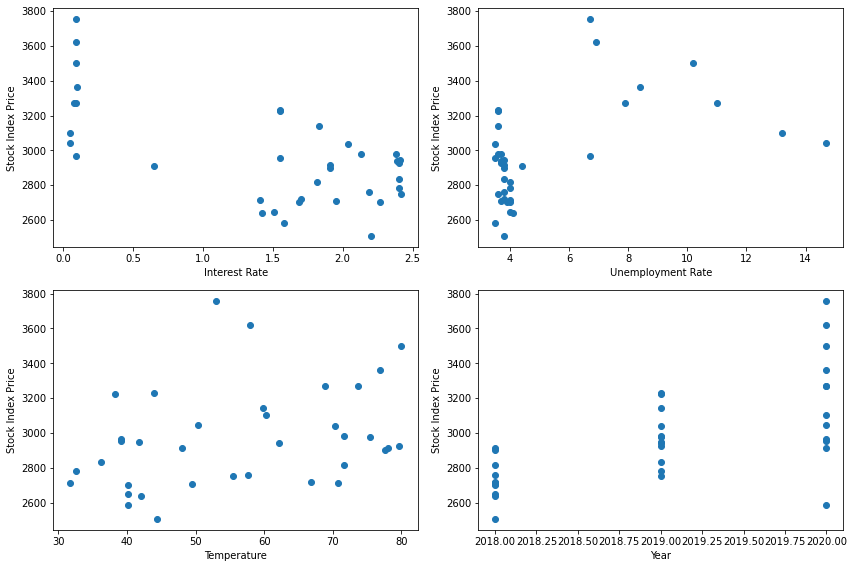

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].scatter(df['Interest_Rate'], df['stock_index_price'])
axs[0, 0].set_xlabel('Interest Rate')
axs[0, 0].set_ylabel('Stock Index Price')
axs[0, 1].scatter(df['Unemployment_Rate'], df['stock_index_price'])
axs[0, 1].set_xlabel('Unemployment Rate')
axs[0, 1].set_ylabel('Stock Index Price')
axs[1, 0].scatter(df['Temperature'], df['stock_index_price'])
axs[1, 0].set_xlabel('Temperature')
axs[1, 0].set_ylabel('Stock Index Price')
axs[1, 1].scatter(df['Year'], df['stock_index_price'])
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Stock Index Price')
plt.tight_layout()
plt.show()

In [9]:
df.rename(columns = {'Interest_Rate':'IR', 'Unemployment_Rate':'UER', 'Temperature':'TEMP'}, inplace = True)
df.to_csv('./CleanData.csv',index=False)

In [10]:
df=pd.read_csv('./CleanData.csv')
df.set_index('Year')
# Examining the relationship between the variables using correlation
print(df.corr())


                         IR       UER      TEMP  stock_index_price      Year
IR                 1.000000 -0.805034 -0.106685          -0.649005 -0.679457
UER               -0.805034  1.000000  0.205482           0.499104  0.601308
TEMP              -0.106685  0.205482  1.000000           0.327836  0.037425
stock_index_price -0.649005  0.499104  0.327836           1.000000  0.666955
Year              -0.679457  0.601308  0.037425           0.666955  1.000000


In [11]:
Y=df.stock_index_price
X=df.drop('stock_index_price',axis=1)

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [13]:
# Predicting Y for our X

Y_pred = regr.predict(X)

print("Mean squared error: %.2f" % mean_squared_error(Y, Y_pred))
print('Variance score: %.2f' % r2_score(Y, Y_pred))

Mean squared error: 31773.44
Variance score: 0.61


In [14]:

Y = df['stock_index_price']

 

In [15]:
X=df[['IR','UER','TEMP']]

In [16]:
X

,IR,UER,TEMP
0,1.41,4.0,31.7
1,1.42,4.1,42.0
2,1.51,4.0,40.1
3,1.69,4.0,49.5
4,1.70,3.8,66.9
5,1.82,4.0,71.7
6,1.91,3.8,77.6
7,1.91,3.8,78.1
8,1.95,3.7,70.7
9,2.19,3.8,57.7


In [17]:
#Step 4:  Fit the regression model for ALL combinations of indep vars
#         Call the function you created in Step 3.
#         Print out the intercept, coefficients and r2 score for each of the cases.
#         Hint:  Extract the X parameter from the dataframe.
#         Hint:  The Y parameter will be Stock_Index_Price for all cases.
#Case 1:  Interest Rate only
#Case 2:  Unemployment Rate only
#Case 3:  GDP only
#Case 4:  Interest Rate + Unemployment Rate
#Case 5:  Interest Rate + GDP
#Case 6:  Unemployment Rate + GDP
#Case 7:  Interest Rate + Unemployment Rate + GDP
# YOUR CODE HERE...



cases = [
    ['IR'],
    ['UER'],
    ['TEMP'],
    ['IR', 'UER'],
    ['IR', 'UER'],
    ['UER', 'TEMP'],
    ['IR', 'UER', 'TEMP']
]

for case in cases:
    X_case = df[case]
    intercept, coefficients, score = MLR(X_case, Y)
    print('Case:', case)
    print('Intercept:', intercept)
    print('Coefficients:', coefficients)
    

#Step 5:  Predict the stock index price using your top 2 models with the following test cases (i.e. the top 2 models with the best r2 scores):
#         You should regenerate your model in case it was overwritten in the previous step when testing the other conditions.
#         Set the values for each of the independent variables, then call the sklearn predict function.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Test case 1:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.75
#                       New_Unemployment_Rate = 5.3
#                       New_GDP = 20.0
#         Test case 2:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.9
#                       New_Unemployment_Rate = 5.9
#                       New_GDP = 21.0
# NOTE - **** if your model does not use all 3 of the parameters given in the test cases above, then just leave them out **** 
# YOUR CODE HERE...

test_cases = [
    {'IR': 2.75, 'UER': 5.3, 'TEMP': 38.3},
    {'IR': 2.9, 'UER': 5.9, 'TEMP': 57.7}
]

# Generate the models for the top 2 cases
X_case1 = df[['IR', 'UER']]
X_case2 = df[['IR', 'TEMP']]
Y = df['stock_index_price']
intercept1, coefficients1, _ = MLR(X_case1, Y)
intercept2, coefficients2, _ = MLR(X_case2, Y)

# Predict the stock index price for the test cases
for test_case in test_cases:
    case1_prediction = intercept1 + coefficients1[0] * test_case['IR'] + coefficients1[1] * test_case['UER']
    case2_prediction = intercept2 + coefficients2[0] * test_case['IR'] + coefficients2[1] * test_case['TEMP']
    print('Test Case:', test_case)
    print('Case 1 Prediction:', case1_prediction)
    print('Case 2 Prediction:', case2_prediction)
    print()
 

Case: ['IR']
Intercept: 3277.140101059066
Coefficients: [-212.12280279]
Case: ['UER']
Intercept: 2707.1160953691406
Coefficients: [50.04122642]
Case: ['TEMP']
Intercept: 2625.204874501264
Coefficients: [6.10109836]
Case: ['IR', 'UER']
Intercept: 3337.3311158896545
Coefficients: [-229.59372733   -6.65731275]
Case: ['IR', 'UER']
Intercept: 3337.3311158896545
Coefficients: [-229.59372733   -6.65731275]
Case: ['UER', 'TEMP']
Intercept: 2486.1616299002903
Coefficients: [45.19539068  4.37731589]
Case: ['IR', 'UER', 'TEMP']
Intercept: 3115.3068323919247
Coefficients: [-244.9313694   -16.23758849    5.23256066]
Test Case: {'IR': 2.75, 'UER': 5.3, 'TEMP': 38.3}
Case 1 Prediction: 2670.6646081473427
Case 2 Prediction: 2618.191157081313

Test Case: {'IR': 2.9, 'UER': 5.9, 'TEMP': 57.7}
Case 1 Prediction: 2632.2311613972297
Case 2 Prediction: 2682.1791300851896

